<a href="https://colab.research.google.com/github/grace1996-beep/week8_core/blob/main/hypothyroid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# defining the question

creating a model to pregdict whether a person has hypothyroid or not using the dataset provided

some oof the models tro be used include;

1. **Random Forests**


2. **Ada boosting**

3. **Support vector machine using linear,polynomial and rbf**


# Metrics of success

1. loading my datasets
2. Checking for null values
3. Checking for duplicaated values
4. checking for outliers.
5. performimg random forest classification
6. performing adaboosting
7. performimg svm

#Importing liblaries

In [1]:
import numpy as np
import pandas as pd


# loading the dataset

In [3]:
data1=pd.read_csv("hypothyroid.csv")
data1

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


#checking  for null values

In [46]:
data1.isnull().sum()
#dataset has no null values

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [48]:
#checkinf for duplicated values
#checking for duplicated values
data1.duplicated().sum()
data1.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [49]:
#checking for unique values
data1.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

# Univariate Analysis

In [53]:
#creating a frequency table to show  occurence of each category here am using 'year'
freq_table=data1.groupby(['status']).size().reset_index(name='Count').rename(columns={'status':'stst'})
freq_table

,stst,Count
0,hypothyroid,151
1,negative,3012


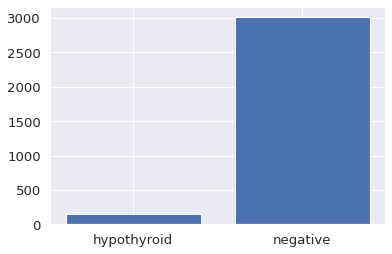

In [54]:
import matplotlib.pyplot as plt
# bar charts are used to display value associated with categorical data
plt.bar(freq_table['stst'],freq_table['Count'])
plt.show()


# Observation

only few people have hypothyroid. most of the people are negative

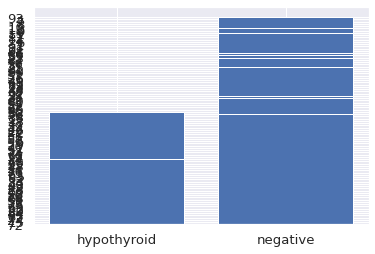

In [58]:
plt.bar(data1['status'],data1["age"])
plt.show()


**Observation**

old people are not prone to getting jhypothyroid

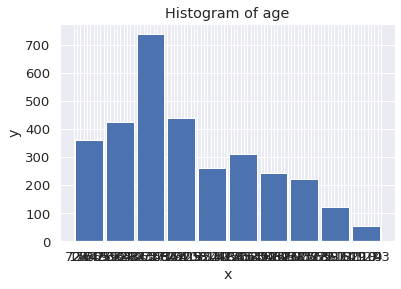

In [62]:
age = data1['age']
bins            = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

plt.hist(age, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of age') 
plt.show()

# Measures of Central Tendancy

In [88]:


cs=df_hypo['goitre1'].mean()
print(cs)
#median
cl=df_hypo['on_pregnant'].mode()
print(cl)
cm=df_hypo['surgery'].median()
print(cm)





0.03129939930445779
0    0
dtype: uint8
0.0


In [90]:
#standard deviation
std=df_hypo['onthyroxine'].std()
std


0.3529088961994643

# Bivariate Analysis

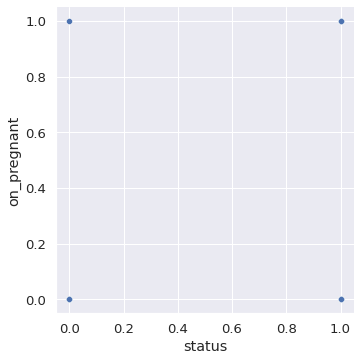

In [94]:
#scatter plot between two numerical values
sns.relplot(x='status',y='on_pregnant',data=df_hypo)

**observation**
there is no relationship between the two

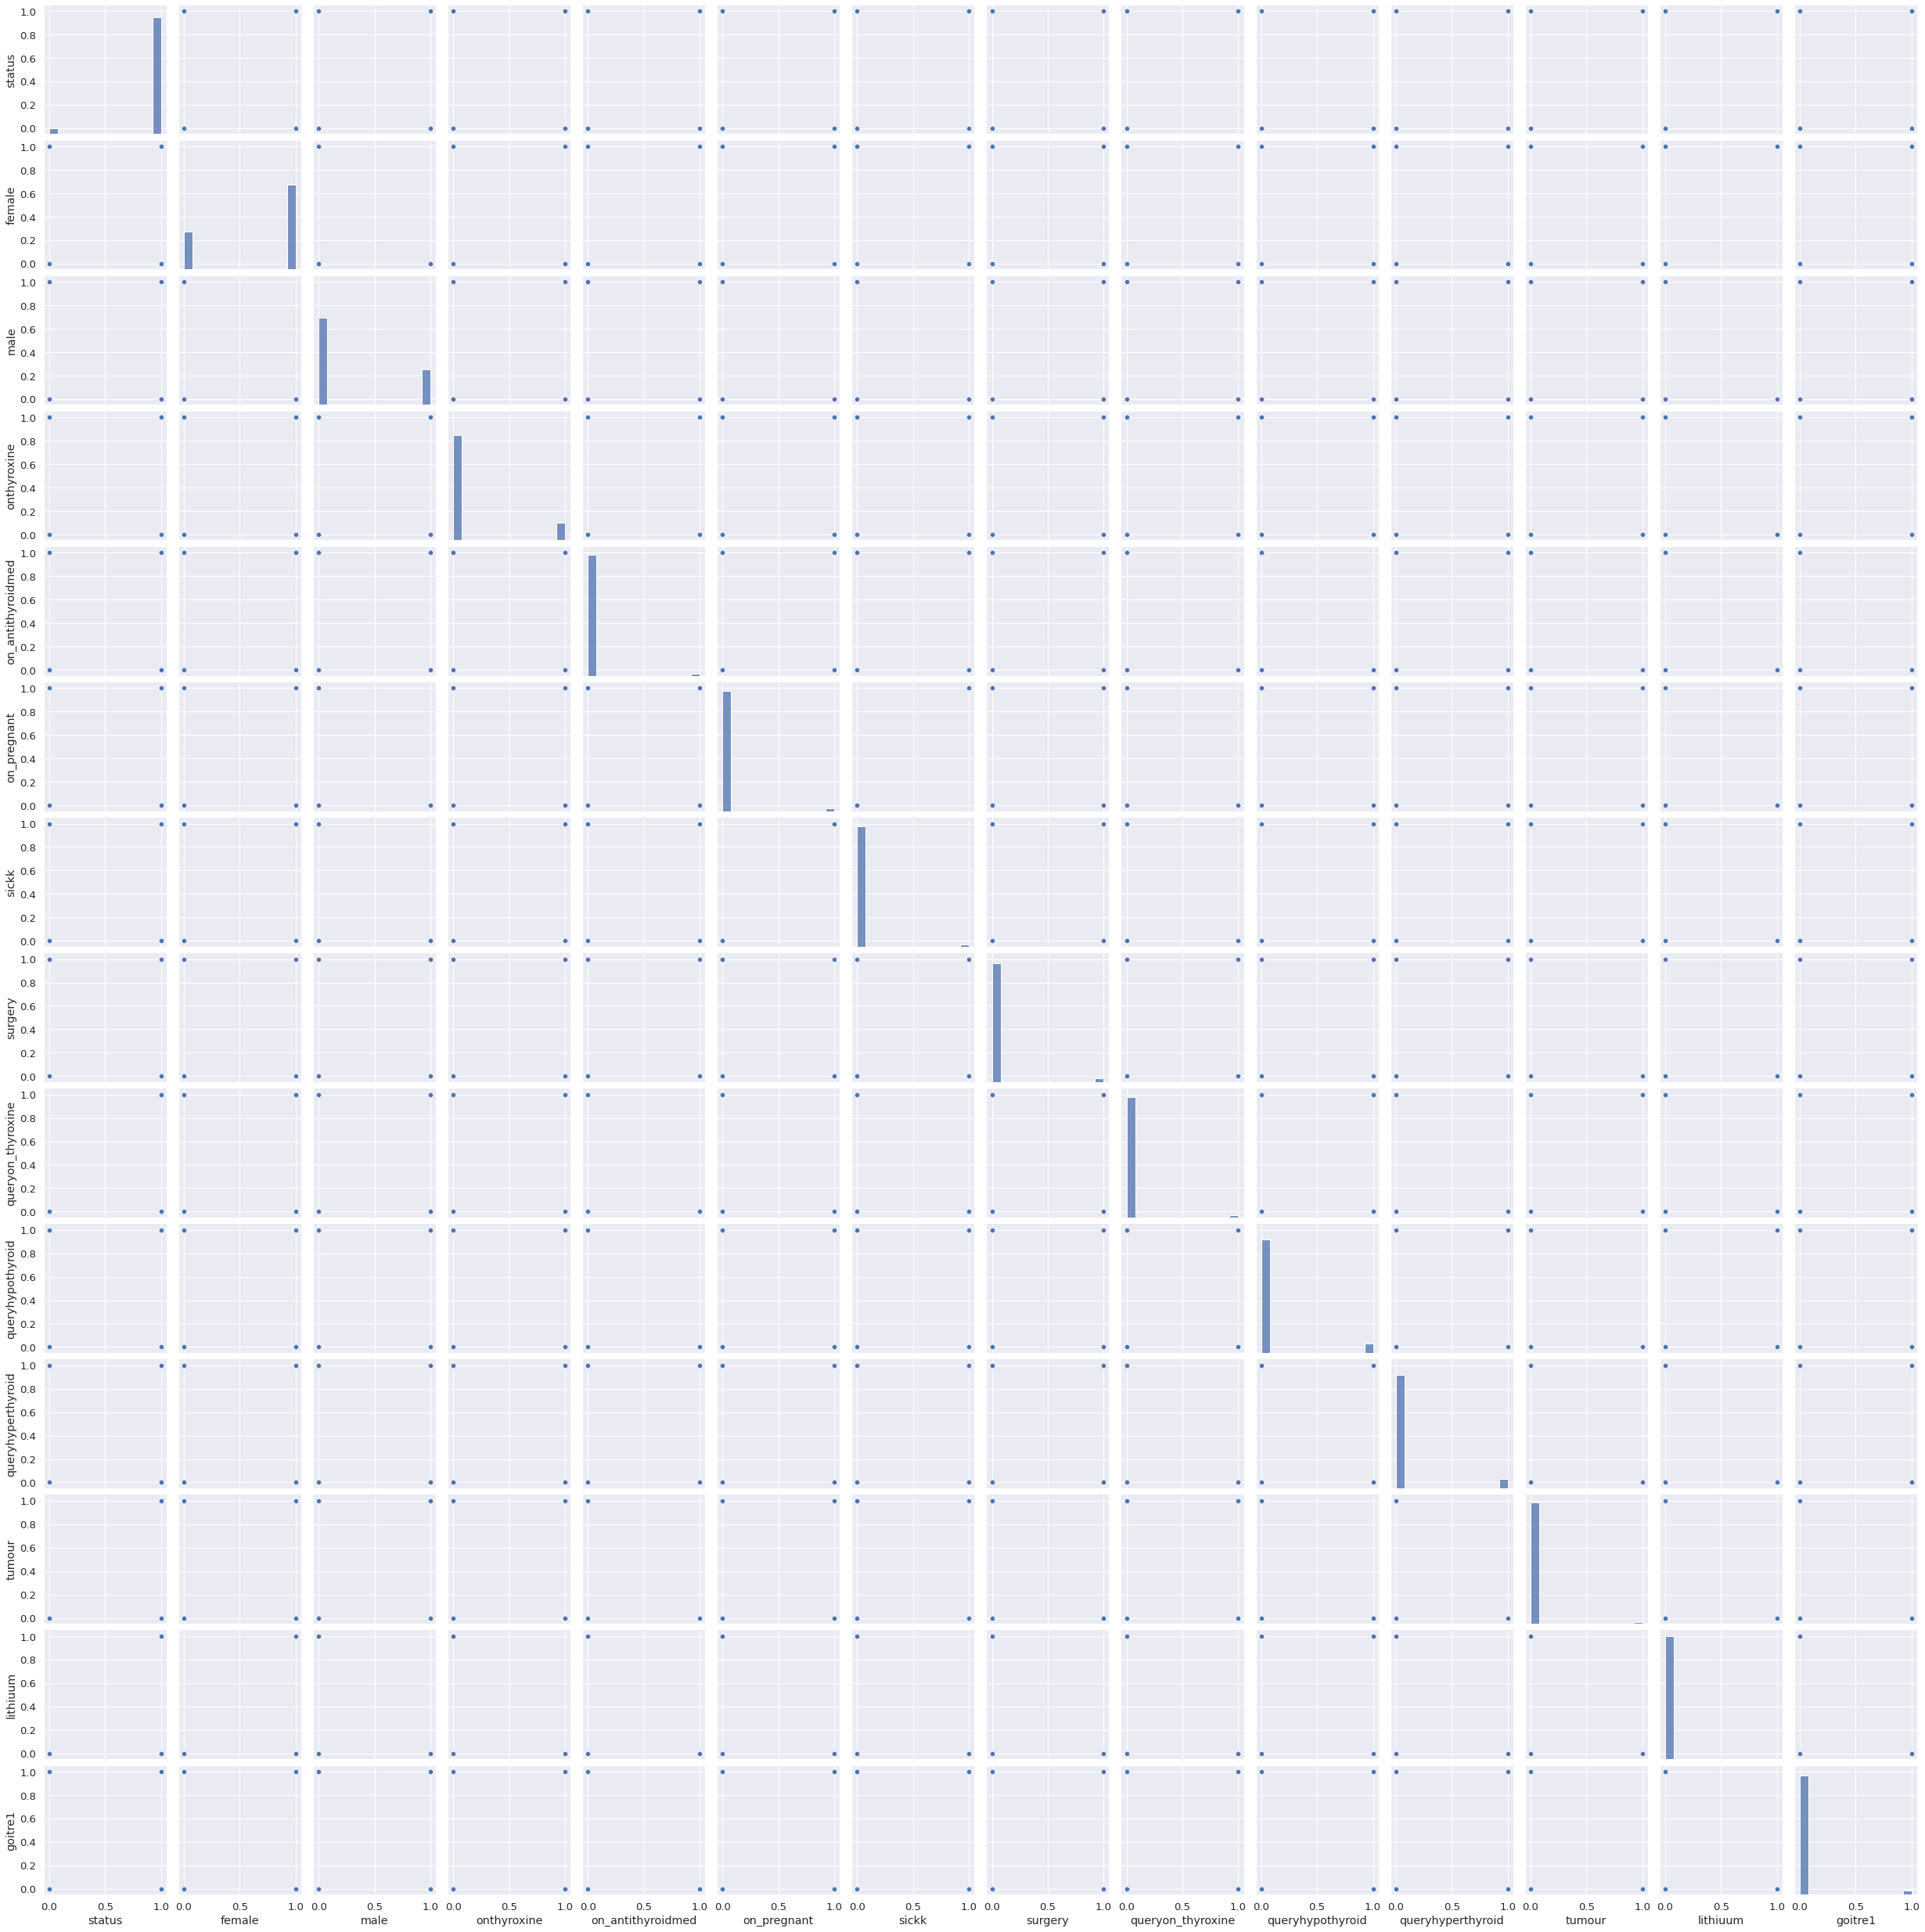

In [85]:
sns.pairplot(df_hypo)
plt.show()

# Documenting steps taken to prepare data for modelling

# changing some columns to dummies

In [4]:
data1
dummy1=pd.get_dummies(data1['status'],drop_first=True)
dummy1
dummy2=pd.get_dummies(data1['sex'],drop_first=True)
dummy2
dummy3=pd.get_dummies(data1['on_thyroxine'],drop_first=True)
dummy3
dummy33 = dummy3.rename(columns = {'t': 'onthyroxine'}, inplace = False)
dummy33
dummy4=pd.get_dummies(data1['on_antithyroid_medication'],drop_first=True)
dummy4
dummy44 = dummy4.rename(columns = {'t': 'on_antithyroidmed'}, inplace = False)
dummy44
dummy5=pd.get_dummies(data1['pregnant'],drop_first=True)
dummy5
dummy55=dummy5.rename(columns = {'t': 'on_pregnant'}, inplace = False)
dummy55
dummy6=pd.get_dummies(data1['sick'],drop_first=True)
dummy6
dummy66=dummy5.rename(columns = {'t': 'sickk'}, inplace = False)
dummy66
dummy7=pd.get_dummies(data1['thyroid_surgery'],drop_first=True)
dummy7
dummy77=dummy7.rename(columns = {'t': 'surgery'}, inplace = False)
dummy77
dummy8=pd.get_dummies(data1['query_on_thyroxine'],drop_first=True)
dummy8
dummy88=dummy8.rename(columns = {'t': 'queryon_thyroxine'}, inplace = False)
dummy88
dummy9=pd.get_dummies(data1['query_hypothyroid'],drop_first=True)
dummy9
dummy99=dummy9.rename(columns = {'t': 'queryhypothyroid'}, inplace = False)
dummy99
dummy10=pd.get_dummies(data1['query_hyperthyroid'],drop_first=True)
dummy10
dummy101=dummy10.rename(columns = {'t': 'queryhyperthyroid'}, inplace = False)
dummy101
dummy11=pd.get_dummies(data1['tumor'],drop_first=True)
dummy11
dummy111=dummy11.rename(columns = {'t':'tumour'}, inplace = False)
dummy111
dummy12=pd.get_dummies(data1['lithium'],drop_first=True)
dummy12
dummy121=dummy12.rename(columns = {'t':'lithiuum'}, inplace = False)
dummy121
dummy13=pd.get_dummies(data1['goitre'],drop_first=True)
dummy13
dummy131=dummy13.rename(columns = {'t':'goitre1'}, inplace = False)
dummy131

,goitre1
0,0
1,0
2,0
3,0
4,0
...,...
3158,0
3159,0
3160,0
3161,0


# Dropping  some columns

In [5]:
data=data1.drop(['sex','status','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre'], axis = 1)
data

,age,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,72,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,15,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,24,y,0,y,0.20,y,4,y,1,y,0,n,?
3,24,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,77,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,29,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,77,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,74,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


# merging dummy dataframes to the original dataset

In [6]:
df=pd.concat([data,dummy1,dummy2,dummy33,dummy44,dummy55,dummy66,dummy77,dummy88,dummy99,dummy101,dummy111,dummy121,dummy131],axis=1)
df

,age,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,negative,F,M,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,y,30,y,0.60,y,15,y,1.48,y,10,n,?,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,y,145,y,1.70,y,19,y,1.13,y,17,n,?,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,y,0,y,0.20,y,4,y,1,y,0,n,?,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,y,430,y,0.40,y,6,y,1.04,y,6,n,?,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3159,29,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3160,77,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3161,74,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
final=df.drop(['TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U',	'FTI_measured',	'FTI',	'TBG_measured',	'TBG'], axis = 1)
final

,age,negative,F,M,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3159,29,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3160,77,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3161,74,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_clean = final.rename(columns = {'negative': 'status'}, inplace = False)
df_clean

,age,status,F,M,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3159,29,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3160,77,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3161,74,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_clean.head()

,age,status,F,M,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df2 = df_clean.rename(columns = {'F': 'female'}, inplace = False)
df2

,age,status,female,M,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3159,29,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3160,77,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3161,74,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_hypo = df2.rename(columns = {'M': 'male'}, inplace = False)
df_hypo

,age,status,female,male,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3159,29,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3160,77,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3161,74,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#this is the dataset il use 
df_hypo.head()

,age,status,female,male,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_hypo.isnull().sum()
#no null values
df_hypo.describe()

,status,female,male,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,0.689851,0.287069,0.145748,0.013279,0.019918,0.019918,0.032880,0.017389,0.076193,0.076826,0.012646,0.000632,0.031299
std,0.213248,0.462627,0.452466,0.352909,0.114483,0.139740,0.139740,0.178351,0.130735,0.265349,0.266357,0.111760,0.025142,0.174153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#checking for datatypes
df_hypo.dtypes

age                  object
status                uint8
female                uint8
male                  uint8
onthyroxine           uint8
on_antithyroidmed     uint8
on_pregnant           uint8
sickk                 uint8
surgery               uint8
queryon_thyroxine     uint8
queryhypothyroid      uint8
queryhyperthyroid     uint8
tumour                uint8
lithiuum              uint8
goitre1               uint8
dtype: object

# simple decision tree

**Assigning x and y variables and spliting my data**

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = df_hypo['status'].values
data.columns

test_features = ['on_pregnant', 'onthyroxine', 'female']
X = df_hypo[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Let's finally create the model. This time il use DecisionTreeRegressor() instead of the classifier.



In [102]:
# Create a decision tree classifier

tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.950043
std,0.198617,0.015782
min,0.000000,0.936585
25%,1.000000,0.936585
50%,1.000000,0.936585
75%,1.000000,0.962085
max,1.000000,1.000000


That looks extremely close. let me check my  metrics

In [103]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08696010631782888
Mean Squared Error: 0.03974720937774471
Root Mean Squared Error: 0.19936702179082855


the model shows quite low errors which shows the model is working well.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


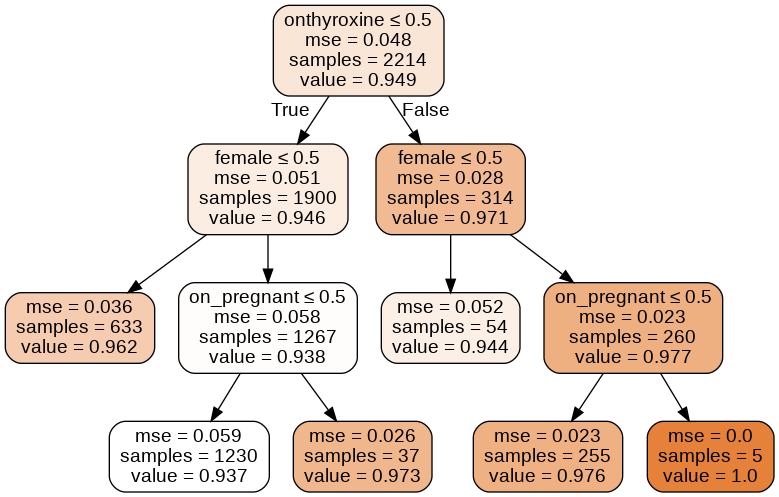

In [106]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ststus.png')
Image(graph.create_png())


## **RANDOM FORESTS**

In this scenario, i will not select specific features. Rather, my  tree will randomly select some and assign them to random trees

In [17]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = df_hypo['status'].values


test_features =test_features = df_hypo.columns.to_list()
test_features.remove('status')
test_features.remove('age')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X =X = df_hypo[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.948646
std,0.198617,0.031275
min,0.000000,0.800093
25%,1.000000,0.946358
50%,1.000000,0.949372
75%,1.000000,0.962854
max,1.000000,0.991079


my model is working quite well. the predicted values are quite close to the actual values

Let's assess how well my random forest is doing.


In [16]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08814674089535585
Mean Squared Error: 0.04040695578142088
Root Mean Squared Error: 0.2010148148307007


My RMSE is less than 0.5 meaning my model has the ability to predict and give correct results

**visualizing the forest of 50 trees**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


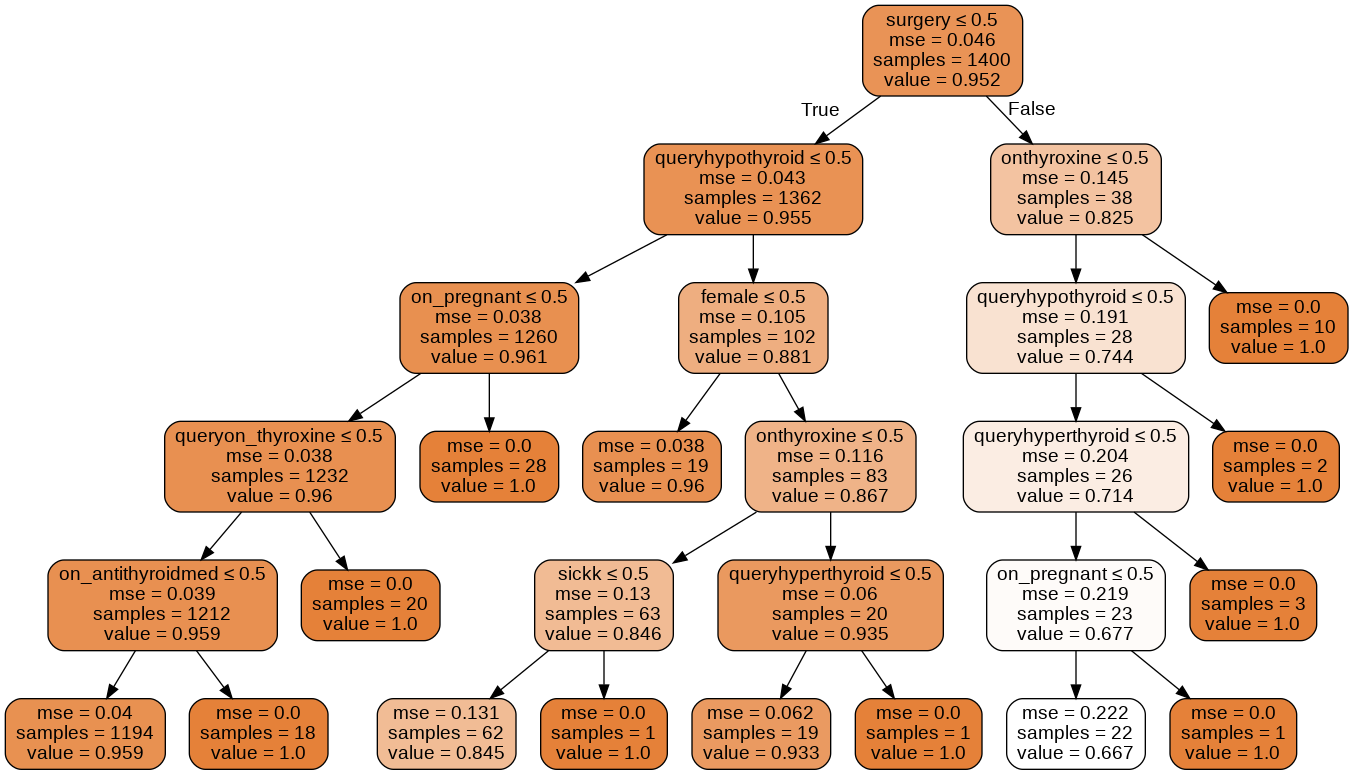

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


**visualizing feature importance**

In [74]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('female', 0.05), ('male', 0.0), ('onthyroxine', 0.25), ('on_antithyroidmed', 0.01), ('on_pregnant', 0.05), ('sickk', 0.01), ('surgery', 0.23), ('queryon_thyroxine', 0.01), ('queryhypothyroid', 0.31), ('queryhyperthyroid', 0.09), ('tumour', 0.0), ('lithiuum', 0.0), ('goitre1', 0.0)]

Variable: queryhypothyroid     Importance: 0.31
Variable: onthyroxine          Importance: 0.25
Variable: surgery              Importance: 0.23
Variable: queryhyperthyroid    Importance: 0.09
Variable: female               Importance: 0.05
Variable: on_pregnant          Importance: 0.05
Variable: on_antithyroidmed    Importance: 0.01
Variable: sickk                Importance: 0.01
Variable: queryon_thyroxine    Importance: 0.01
Variable: male                 Importance: 0.0
Variable: tumour               Importance: 0.0
Variable: lithiuum             Importance: 0.0
Variable: goitre1              Importance: 0.0


**visually representing feature importance**

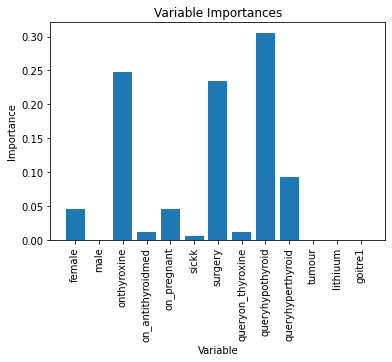

In [75]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# ADA BOOSTING

**importing liblaries**

In [18]:
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

**creating x and y variables**

In [19]:
X =X = df_hypo[test_features].values
y = df_hypo['status'].values



**dividing my data into tain and test dataset**

In [20]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**creating adaboost classifier object**

In [21]:
#create adaboost classifier object
AdaModel=AdaBoostClassifier(n_estimators=100,learning_rate=1)

**Trainingv my model**

In [22]:
#training adaboost model\
model=AdaModel.fit(X_train,y_train)
#predict the response for the test dataset
y_pred=model.predict(X_test)

**checking ifor model accuracy**

In [23]:
#model accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9589257503949447


from the accuracy my model is working quite well

**Evaluating my model using svc**

In [24]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9589257503949447


Well, i got a classification rate of 95.90%, considered as good accuracy.

In this case, SVC Base Estimator is getting better accuracy then Decision tree Base Estimator.


My ada boosted model i also having a better accuracy .

Pros


AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available.

Cons


AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.

**conclusion**

Comparison of decision trees Performance

If i compare the performance of the different types of decision trees  i can clearly see that the random forest performed  the best.the simple decision tree was working okay but my concern is it had errors almost to zero which could have indicated probability of overfiting.

my ada boost was also bworking well but its performance was not correct as compared to my random forests performance

# SUPPORT VECTOR MACHINE

#Importing liblaries

In [14]:
df_hypo.head()#this is the datset il use for svm

,age,status,female,male,onthyroxine,on_antithyroidmed,on_pregnant,sickk,surgery,queryon_thyroxine,queryhypothyroid,queryhyperthyroid,tumour,lithiuum,goitre1
0,72,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example 1: Hypothyroid Classification

I am  going to implement SVM with the aim of classifying a medical condition whether a hypothyroid case or not.

**Defining x and y**

In [18]:
X =X = df_hypo[test_features].values
y = df_hypo['status'].values

**splitting the dataset into train and test sets**

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=109)

**importing svm classifier**

In [30]:
from sklearn import svm
#creating a svm classifier using linear
clf=svm.SVC(kernel='linear')
#training my model using training sets
clf.fit(X_train,y_train)
#predicting the response for the test dataset
y_pred=clf.predict(X_test)


**Evaluating the model**

In [41]:
from sklearn import metrics
#model accuracy how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))



Accuracy: 0.9652265542676501


well a classification rate of 96.52% is considered as a  very good accuracy

**further evaluation of the model**

In [32]:
#model precision: what percentage of positive tuples are labled as such?
print("Precision:",metrics.precision_score(y_test,y_pred))
#model recall: What percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test,y_pred))

Precision: 0.9652265542676501
Recall: 1.0


a precision of 96% and rcall of 1 are considered as very good values

**model prediction**

In [36]:
pred= model.predict([[1,	0	,0,	0	,0,	0,	0,	0,	0,	0	,0,	0	,0]])
pred

array([1], dtype=uint8)

my model gave us an output of 1 which means that it correctly predicted a hypothyroid to be negative. 


**Conclusion**


i did not need to plot a graph but i was able to get some pretty accurate results. One major resaon behind this is that i am dealing with multiple features so it would have been pretty hard to visualize.

# Polynomial Kernel Function

**Dividing data into x and y an splitting data into train and test set**

In [111]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = df_hypo['status'].values
data.columns

test_features = ['on_pregnant', 'onthyroxine', 'female']
X = df_hypo[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


**importing csv function and fiting my model**

In [112]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
y_pred = svclassifier.predict(X_test)



**Model evaluation**

In [114]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  39]
 [  0 910]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.96      1.00      0.98       910

    accuracy                           0.96       949
   macro avg       0.48      0.50      0.49       949
weighted avg       0.92      0.96      0.94       949



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


my polynomial model is working better than my  linear kernel model.

THis model has a acuracy of 97% as seen from the above output meaning my model is working just fine.


My linear model has a accuracy of 96%

# RBF kernel function

**assigning x and y variables**

In [41]:
X =X = df_hypo[test_features].values
y = df_hypo['status'].values

**splitting my dataset**

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=109)

**importing svc classifier and fitting it**

In [43]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
y_pred = svclassifier.predict(X_test)

**Evaluating the model**

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  33]
 [  0 916]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.97      1.00      0.98       916

    accuracy                           0.97       949
   macro avg       0.48      0.50      0.49       949
weighted avg       0.93      0.97      0.95       949



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**conclusion**





my rbf kernel function is workin okay just as my polynomial function. in this case i will  choose to work with the two models to predict results of my main goal

# follow up questions


1. did i have the right data? yes jmy data was okay to perform my analysis.


# Conclusion



1. older people are not prone to getting hypothyroid

2. hypothyroid affects ypung people

3. theres no relationship between hypothyroid and pregnancy